In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [101]:
data = pd.read_csv("xgb_data.csv")

In [115]:
data = data.set_index('time')

### exploration

In [4]:
df_avg_consumption = data.groupby("time")["load_L0"].mean()
df_avg_consumption = pd.DataFrame({"time": df_avg_consumption.index.tolist(), "load": df_avg_consumption.values.tolist()})
df_avg_consumption["time"] = pd.to_datetime(df_avg_consumption["time"])
print(f"From: {df_avg_consumption['time'].min()}")
print(f"To: {df_avg_consumption['time'].max()}")

From: 2017-03-18 00:00:00
To: 2021-01-15 23:00:00


<Axes: xlabel='time'>

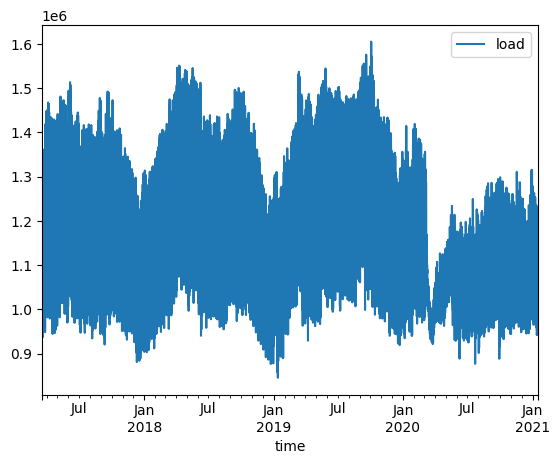

In [5]:
df_avg_consumption.plot(x="time", y="load")

zooming in bc what even is this data tbh

<Axes: xlabel='time'>

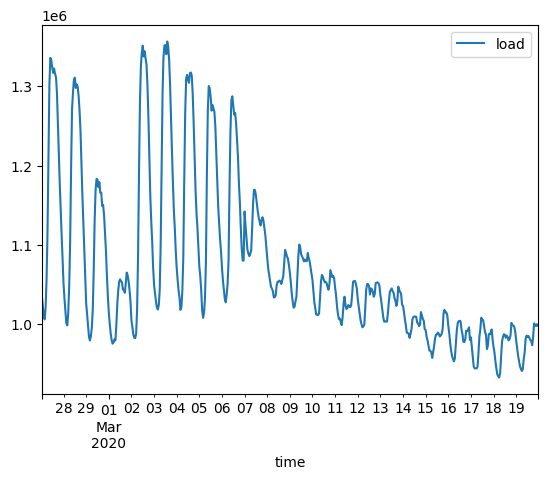

In [22]:
df_avg_consumption.query("time > '2020-02-27' & time < '2020-03-20'").plot(x="time", y="load")

changepoint ard the 7th march 2020? me say yes idk sia wtv

## Splitting data!! <br>
Doing an 80:20 split bc then it'll include SOME covid data

In [42]:
data.columns

Index(['time', 'load_L0', 'pressure_kpa', 'cloud_cover', 'humidity',
       'temperature_c', 'wind_direction', 'wind_speed_kmh', 'month', 'hour',
       'day', 'covid', 'public_holiday', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'load_L1', 'load_L2', 'load_L3',
       'load_L19', 'load_L23', 'load_L24', 'load_L25', 'load_L26', 'load_L50',
       'load_L168'],
      dtype='object')

In [108]:
data.drop(['hour_sin', 'hour_cos','month_sin','month_cos','day_sin'], axis=1)

,time,load_L0,pressure_kpa,cloud_cover,humidity,temperature_c,wind_direction,wind_speed_kmh,month,hour,...,load_L1,load_L2,load_L3,load_L19,load_L23,load_L24,load_L25,load_L26,load_L50,load_L168
0,2017-03-25 00:00:00,1031410.21278,1011.86625,0.00000,70.33333,13.31189,298.62500,3.38750,3,0,...,1064298.24834,1104562.67792,1133962.44346,990423.76122,1027063.05286,1054376.28450,1084232.32404,1115131.74158,1108793.14944,1031471.62806
1,2017-03-25 01:00:00,1012118.56504,1011.98000,0.00000,73.91667,11.97939,303.37500,8.75500,3,1,...,1031410.21278,1064298.24834,1104562.67792,1006821.66098,1008183.72710,1027063.05286,1054376.28450,1084232.32404,1078661.09394,1007205.57844
2,2017-03-25 02:00:00,994928.07524,1010.74625,0.00000,76.00000,11.82939,322.50000,11.17500,3,2,...,1012118.56504,1031410.21278,1064298.24834,1066259.17190,995523.52926,1008183.72710,1027063.05286,1054376.28450,1046058.61636,986108.40072
3,2017-03-25 03:00:00,982095.92542,1010.51375,0.00000,75.00000,11.54439,336.12500,6.28625,3,3,...,994928.07524,1012118.56504,1031410.21278,1183252.94012,987648.43134,995523.52926,1008183.72710,1027063.05286,1019645.98268,970760.96692
4,2017-03-25 04:00:00,978078.65556,1010.62500,0.00000,78.58333,10.09939,140.87500,5.79625,3,4,...,982095.92542,994928.07524,1012118.56504,1285285.07834,990423.76122,987648.43134,995523.52926,1008183.72710,1001757.36102,962258.36502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33427,2021-01-15 19:00:00,1141078.93200,1013.38750,38.37500,68.33333,11.73439,306.87500,6.63375,1,19,...,1167738.93200,1193034.93200,1213969.43200,989585.93200,1106097.93200,1137035.43200,1167472.93200,1189423.43200,1185377.93200,1148607.43200
33428,2021-01-15 20:00:00,1108896.43200,1013.97500,28.12500,73.91667,9.05689,297.62500,10.08750,1,20,...,1141078.93200,1167738.93200,1193034.93200,976221.43200,1076111.93200,1106097.93200,1137035.43200,1167472.93200,1164819.93200,1115582.43200
33429,2021-01-15 21:00:00,1078978.43200,1014.18750,21.12500,75.83333,8.41439,334.00000,8.18000,1,21,...,1108896.43200,1141078.93200,1167738.93200,965163.93200,1044110.93200,1076111.93200,1106097.93200,1137035.43200,1134484.93200,1086329.43200
33430,2021-01-15 22:00:00,1044494.93200,1014.12500,17.37500,74.25000,8.04189,73.62500,4.12250,1,22,...,1078978.43200,1108896.43200,1141078.93200,957355.93200,1011590.93200,1044110.93200,1076111.93200,1106097.93200,1104779.43200,1057486.43200


In [63]:
#dropping date bc it's redundant yay
# data = data.drop(['time'], axis=1)

set as category type

In [136]:
def non_shuffling_train_test_split(X, y, test_size=0.3):
    i = int((1 - test_size) * X.shape[0]) + 1
    X_train, X_test = np.split(X, [i])
    y_train, y_test = np.split(y, [i])
    return X_train, X_test, y_train, y_test

In [138]:
X_train, X_test, y_train, y_test = non_shuffling_train_test_split(data, data['load_L0'], 0.3)

In [139]:
X_train = X_train.drop(['load_L0'],axis=1)
X_test = X_test.drop(['load_L0'],axis=1)

Training the Model

In [ ]:
# !pip install xgboost

### not multi-step forecasting :(

In [142]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [52]:
class TargetTransformer:
    """
    Perform some transformation on the time series
    data in order to make the model more performant and
    avoid non-stationary effects.
    """
        
    def __init__(self, log=False, detrend=False, diff=False):
        
        self.trf_log = log
        self.trf_detrend = detrend
        self.trend = pd.Series(dtype=np.float64)
    
    def transform(self, index, values):
        """
        Perform log transformation to the target time series

        :param index: the index for the resulting series
        :param values: the values of the initial series

        Return:
            transformed pd.Series
        """
        res = pd.Series(index=index, data=values)

        if self.trf_detrend:
            self.trend = TargetTransformer.get_trend(res) - np.mean(res.values)
            res = res.subtract(self.trend)
            
        if self.trf_log:
            res = pd.Series(index=index, data=np.log(res.values))
        
        return res
    
    def inverse(self, index, values):
        """
        Go back to the original time series values

        :param index: the index for the resulting series
        :param values: the values of series to be transformed back

        Return:
            inverse transformed pd.Series
        """        
        res = pd.Series(index=index, data=values)
        
        if self.trf_log:
            res = pd.Series(index=index, data=np.exp(values))
        try:
            if self.trf_detrend:
                assert len(res.index) == len(self.trend.index)                
                res = res + self.trend
                
        except AssertionError:
            print("Use a different transformer for each target to transform")
            
        return res
    
    @staticmethod
    def get_trend(data):
        """
        Get the linear trend on the data which makes the time
        series not stationary
        """
        n = len(data.index)
        X = np.reshape(np.arange(0, n), (n, 1))
        y = np.array(data)
        model = LinearRegression()
        model.fit(X, y)
        trend = model.predict(X)
        return pd.Series(index=data.index, data=trend)

In [74]:
y_train.head()

0   1031410.21278
1   1012118.56504
2    994928.07524
3    982095.92542
4    978078.65556
Name: load_L0, dtype: float64

In [75]:
y_train_trf = TargetTransformer(log=False, detrend=False)

In [76]:
#perform log transformation on target values
y_train = y_train_trf.transform(y_train.index, y_train.values)

In [78]:
y_test.head()

26746    996913.55295
26747    999663.55295
26748   1004613.55295
26749   1007363.55295
26750   1009563.55295
Name: load_L0, dtype: float64

In [79]:
y_test_trf = TargetTransformer(log=False, detrend=False)
y_test = y_test_trf.transform(y_test.index, y_test.values)

In [80]:
y_test.head()

26746    996913.55295
26747    999663.55295
26748   1004613.55295
26749   1007363.55295
26750   1009563.55295
dtype: float64

it's the same anyways????

In [213]:
reg = xgb.XGBRegressor(n_estimators=500)  #try 1000 later yay
reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        learning_rate=
        verbose=True)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3668502167.py, line 5)

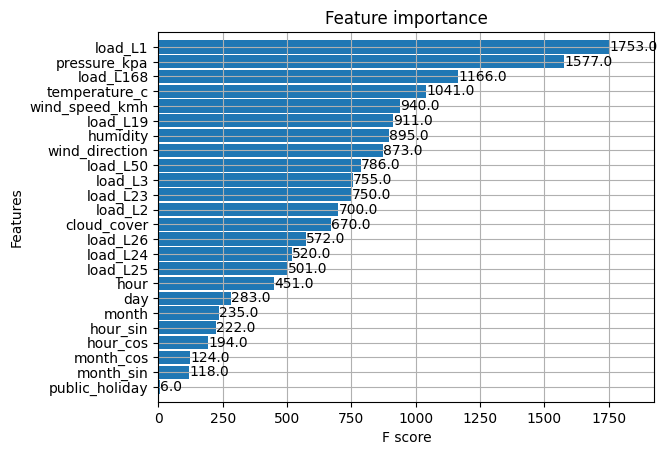

In [144]:
_ = plot_importance(reg, height=0.9)

In [148]:
X_test.head()

,pressure_kpa,cloud_cover,humidity,temperature_c,wind_direction,wind_speed_kmh,month,hour,day,covid,...,load_L1,load_L2,load_L3,load_L19,load_L23,load_L24,load_L25,load_L26,load_L50,load_L168
time,,,,,,,,,,,,,,,,,,,,,
2019-11-25 03:00:00,1012.70000,0.00000,78.33333,10.86689,46.25000,10.88500,11,3,1,0,...,949785.04814,969285.04814,991285.04814,973285.04814,952285.04814,959285.04814,976785.04814,1016285.04814,1066785.04814,1001285.04814
2019-11-25 04:00:00,1012.46250,0.00000,78.91667,10.32689,67.00000,10.40250,11,4,1,0,...,942285.04814,949785.04814,969285.04814,1007285.04814,954285.04814,952285.04814,959285.04814,976785.04814,1041785.04814,995285.04814
2019-11-25 05:00:00,1012.57500,0.00000,80.41667,9.19689,75.00000,3.80875,11,5,1,0,...,940285.04814,942285.04814,949785.04814,1033285.04814,953285.04814,954285.04814,952285.04814,959285.04814,1026285.04814,1008285.04814
2019-11-25 06:00:00,1013.17500,0.00000,82.08333,8.13439,75.25000,3.51250,11,6,1,0,...,955285.04814,940285.04814,942285.04814,1042285.04814,947785.04814,953285.04814,954285.04814,952285.04814,1015785.04814,1049285.04814
2019-11-25 07:00:00,1014.07500,0.00000,80.58333,8.64689,67.50000,3.77375,11,7,1,0,...,995285.04814,955285.04814,940285.04814,1051785.04814,973285.04814,947785.04814,953285.04814,954285.04814,1023785.04814,1124785.04814


In [203]:
len(y_test['2019-11-26 00:00:00':'2019-11-27 23:00:00'])

48

In [214]:
testing_set = y_test.to_frame()

In [215]:
testing_set['load_prediction'] = reg.predict(X_test)

In [216]:
testing_set.head()

,load_L0,load_prediction
time,,
2019-11-25 03:00:00,942285.04814,938939.56250
2019-11-25 04:00:00,940285.04814,937989.43750
2019-11-25 05:00:00,955285.04814,959288.12500
2019-11-25 06:00:00,995285.04814,989525.37500
2019-11-25 07:00:00,1075785.04814,1065693.87500


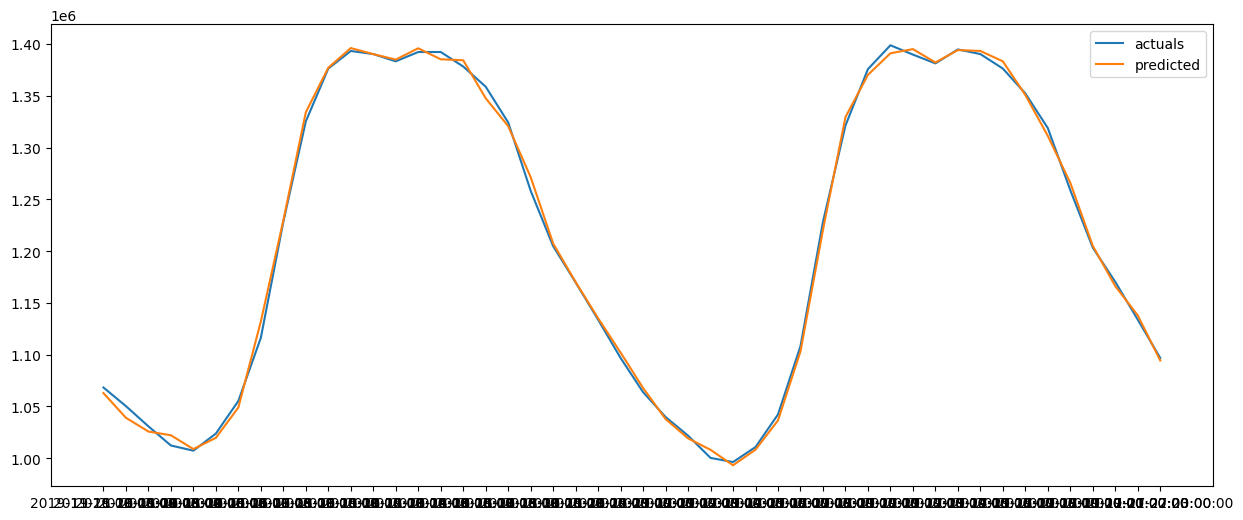

In [222]:
plt.figure(figsize=(15,6))
# testing_set.plot(legend=True, x='time', y='load_L0')
plt.plot(testing_set['2019-11-26 00:00:00':'2019-11-27 23:00:00']['load_L0'])
plt.plot(testing_set['2019-11-26 00:00:00':'2019-11-27 23:00:00']['load_prediction'])
plt.legend(['actuals','predicted'])
plt.show()

In [218]:
mean_squared_error(y_true=testing_set['load_L0'], 
                    y_pred=testing_set['load_prediction'])

121794481.34808645

In [175]:
import math

In [219]:
def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted)/actual))*100

def calculate_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

In [220]:
mae = calculate_mae(testing_set['load_L0'], testing_set['load_prediction'])
mape = calculate_mape(testing_set['load_L0'], testing_set['load_prediction'])
rmse = calculate_rmse(testing_set['load_L0'], testing_set['load_prediction'])

In [221]:
print('MAE: '+ str(mae))
print('MAPE: '+ str(mape))
print('RMSE: '+ str(rmse))

MAE: 7877.6998310474355
MAPE: 0.7368261162248062
RMSE: 11036.053703570242


### Recursive Multi step forecasting to get 48 values?

In [ ]:
def train_xgb(params, X_train, y_train):
    """
    Train XGBoost regressor using the parameters given as input. The model
    is validated using standard cross validation technique adapted for time series
    data. This function returns a friendly output for the hyperopt parameter optimization
    module.
    
    Parameters
    ----------
    params: dict with the parameters of the XGBoost regressor. For complete list see: 
            https://xgboost.readthedocs.io/en/latest/parameter.html
    X_train: pd.DataFrame with the training set features
    y_train: pd.Series with the training set targets    
    
    Returns
    -------
    dict with keys 'model' for the trained model, 'status' containing the hyperopt
    status string and 'loss' with the RMSE obtained from cross-validation
    """
    
    n_estimators = int(params["n_estimators"])
    max_depth= int(params["max_depth"])

    try:
        model = xgb.XGBRegressor(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                 learning_rate=params["learning_rate"],
                                 subsample=params["subsample"])

        result = model.fit(X_train, 
                           y_train.values.ravel(),
                           eval_set=[(X_train, y_train.values.ravel())],
                           early_stopping_rounds=50,
                           verbose=False)
        
        # cross validate using the right iterator for time series
        cv_space = TimeSeriesSplit(n_splits=5)
        cv_score = cross_val_score(model, 
                                   X_train, y_train.values.ravel(), 
                                   cv=cv_space, 
                                   scoring=mape_scorer)

        rmse = np.abs(np.mean(np.array(cv_score)))
        return {
            "loss": rmse,
            "status": STATUS_OK,
            "model": model
        }
        
    except ValueError as ex:
        return {
            "error": ex,
            "status": STATUS_FAIL
        }
    

In [ ]:
def optimize_xgb(X_train, y_train, max_evals=10):
    """
    Run Bayesan optimization to find the optimal XGBoost algorithm
    hyperparameters.
    
    Parameters
    ----------
    X_train: pd.DataFrame with the training set features
    y_train: pd.Series with the training set targets
    max_evals: the maximum number of iterations in the Bayesian optimization method
    
    Returns
    -------
    best: dict with the best parameters obtained
    trials: a list of hyperopt Trials objects with the history of the optimization
    """
    
    space = {
        "n_estimators": hp.quniform("n_estimators", 100, 1000, 10),
        "max_depth": hp.quniform("max_depth", 1, 8, 1),
        "learning_rate": hp.loguniform("learning_rate", -5, 1),
        "subsample": hp.uniform("subsample", 0.8, 1),
        "gamma": hp.quniform("gamma", 0, 100, 1)
    }

    objective_fn = partial(train_xgb, 
                           X_train=X_train, 
                           y_train=y_train)
    
    trials = Trials()
    best = fmin(fn=objective_fn,
                space=space,
                algo=tpe.suggest,
                max_evals=max_evals,
                trials=trials)

    # evaluate the best model on the test set
    print(f"""
    Best parameters:
        learning_rate: {best["learning_rate"]} 
        n_estimators: {best["n_estimators"]}
        max_depth: {best["max_depth"]}
        sub_sample: {best["subsample"]}
        gamma: {best["gamma"]}
    """)
    return best, trials

best, trials = optimize_xgb(X_train, y_train, max_evals=50)